# Comparison of NNs and CGP

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Body-brain evolution with GA 

In [3]:
dfs = []
for seed in range(10):
    try:
        tmp_df = pd.read_csv(f"../results/ga/evo-body-10x10_{seed}.csv")
        tmp_df["controller"] = "CGP"
        tmp_df["seed"] = seed
        dfs.append(tmp_df)
    except FileNotFoundError:
        print(f"CGP -> {seed}")
    try:
        tmp_df = pd.read_csv(f"../results/ga/evo-body-nn-10x10-walker_{seed}.csv")
        tmp_df["controller"] = "NN"
        tmp_df["seed"] = seed
        dfs.append(tmp_df)
    except FileNotFoundError:
        print(f"NN -> {seed}")
df = pd.concat(dfs)
df.head()

CGP -> 8
CGP -> 9


,iteration,max_fitness,time,current_time,controller,seed
0,1,0.732285,7.725963,2024-08-09 16:57:02.912419,CGP,0
1,2,0.732285,7.299634,2024-08-09 16:57:10.230573,CGP,0
2,3,0.732285,7.345170,2024-08-09 16:57:17.576247,CGP,0
3,4,1.220242,7.475896,2024-08-09 16:57:25.052683,CGP,0
4,5,2.104340,7.290238,2024-08-09 16:57:32.343374,CGP,0


In [4]:
final_df = df[df["iteration"] == max(df["iteration"])]

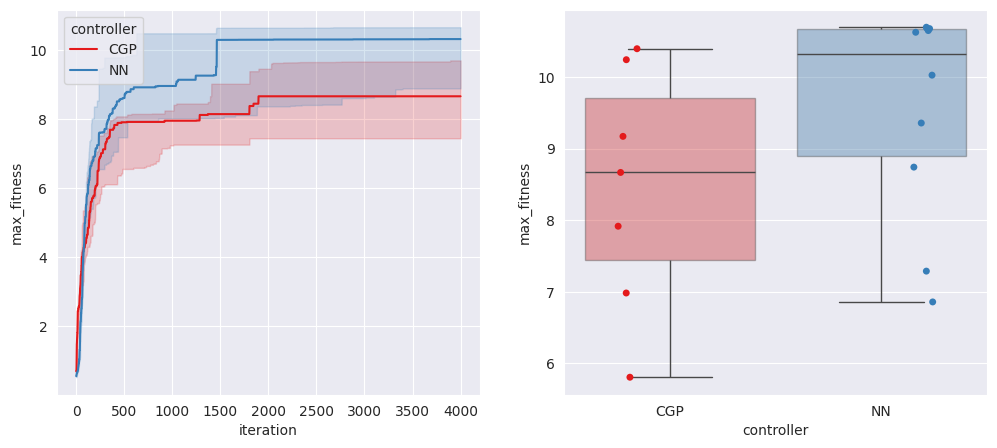

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.lineplot(df,
             x="iteration",
             y="max_fitness",
             estimator="median",
             errorbar=("pi", 50),
             hue="controller",
             palette="Set1",
             ax=axs[0]
             )
sns.boxplot(
    final_df,
    x="controller",
    y="max_fitness",
    hue="controller",
    palette="Set1",
    boxprops={'alpha': 0.4},
    ax=axs[1]
)
sns.stripplot(final_df,
              x="controller",
              y="max_fitness",
              hue="controller",
              palette="Set1",
              dodge=True,
              ax=axs[1])
plt.show()